## HW 3

1) Analysis of the blood_cell image

2) Read the blood cell image into a numpy matrix im.
3) Display  im (matplotlib). 
4) Separate im into 3 channels.
5) Print the min, max, mode, median, mean, var, std of red, green, blue channels
6)  Display the histogram of green channel
7)  We would like to create a binary mask of foreground cells. Binary mask is a matrix of image widthxheight where the foreground values are 1 and background values are 0. 
     To solve this, inspect the green channel of the image. Inspect the histogram to understand the foreground pixel values, and background pixel values.  
  
     Threshold the image im_fg = im_green<threshold to create the binary mask. 
     
8)  Then calculate the mean of only the foreground image for red,green,blue channels and std for red, green, blue channels. 

9) Repeat above (7,8) to calculate a binary mask for WBC (in the center). 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread('rbc.png')

plt.imshow(image)

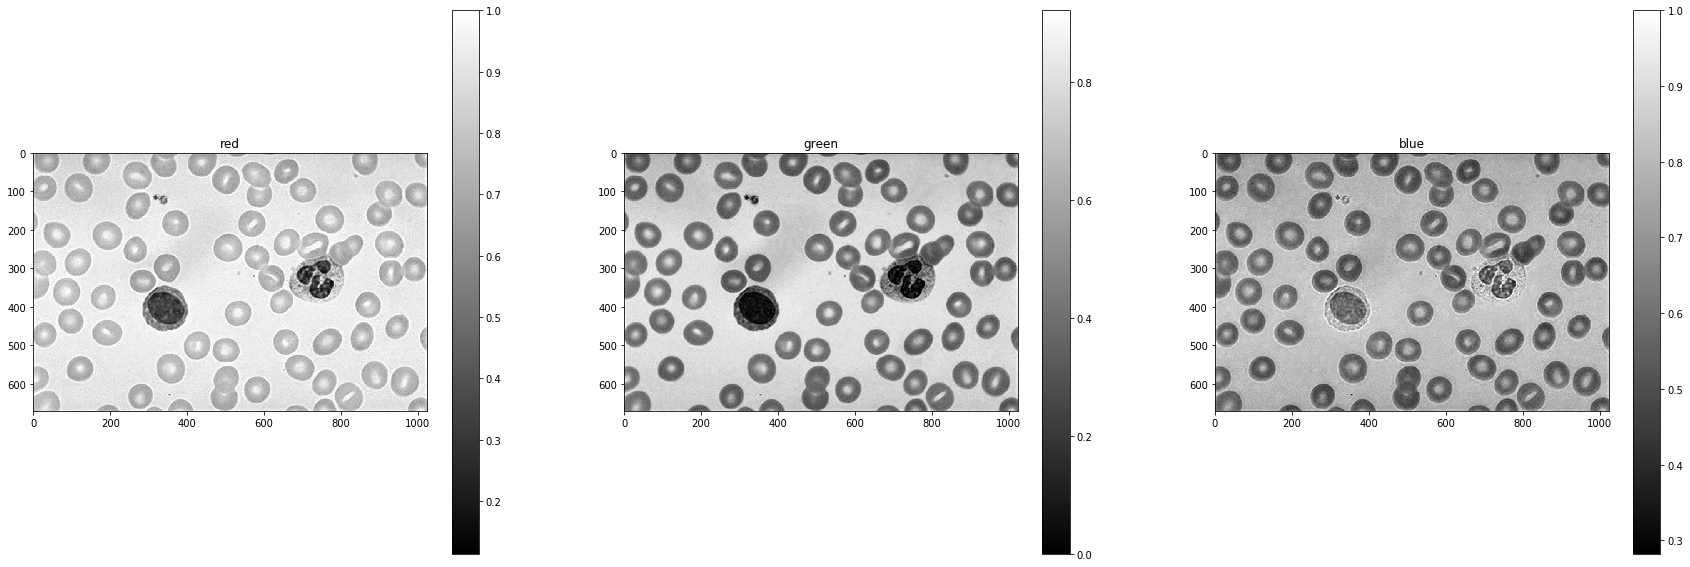

In [2]:
# Separate im into 3 channels.
im_r = image[:,:,0]
im_g = image[:,:,1]
im_b = image[:,:,2]
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(im_r,cmap="gray")
plt.colorbar()
plt.title('red')

plt.subplot(1,3,2)
plt.imshow(im_g,cmap="gray")
plt.colorbar()
plt.title('green')


plt.subplot(1,3,3)
plt.imshow(im_b,cmap="gray")
plt.colorbar()
plt.title('blue')
plt.show()


In [3]:
# Print the min, max, mode, median, mean, var, std of red, green, blue channels
print("min:",im_r.min())
print("max:",im_r.max())
from scipy.stats import mode
print("mode:",mode(im_r)) 
print("median:",np.median(im_r))
print("var: ",im_r.var())
print("std:",im_r.std())

# repeat above for red , green , bluue

min: 0.11372549
max: 1.0
mode: ModeResult(mode=array([[1.        , 1.        , 0.99215686, ..., 0.9764706 , 0.98039216,
        1.        ]], dtype=float32), count=array([[119,  58,  31, ...,  53,  55, 171]]))
median: 0.89411765
var:  0.013447014
std: 0.11596126


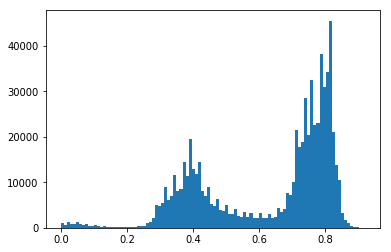

In [7]:
# 6) Display the histogram of green channel
plt.hist(im_g.flatten(), 100) # you can plot in 256 bins
plt.show()

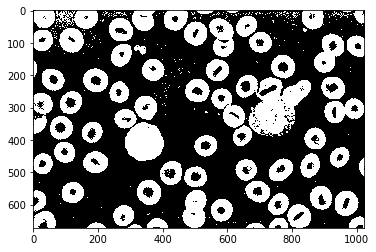

In [14]:
# 7 prepare the mask for green channel
msk_fg = im_r<0.85
plt.imshow(msk_fg, cmap="gray")
plt.title('foreground mask')

In [16]:
#8) Then calculate the mean of only the foreground image for red,green,blue channels and std for red, green, blue channels. 
im_fg_green = im_g[msk_fg]
print("min:",im_fg_green.min())
print("max:",im_fg_green.max())
print("mode:",mode(im_fg_green)) 
print("median:",np.median(im_fg_green))
print("var: ",im_fg_green.var())
print("std:",im_fg_green.std())

min: 0.0
max: 0.74509805
mode: ModeResult(mode=array([0.4], dtype=float32), count=array([6648]))
median: 0.39607844
var:  0.011654878
std: 0.10795776


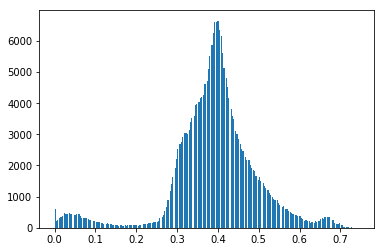

In [19]:
# extra new histogram to understand where is wbc
plt.hist(im_fg_green.flatten(), 256)
plt.show()

Text(0.5, 1.0, 'wbc mask')

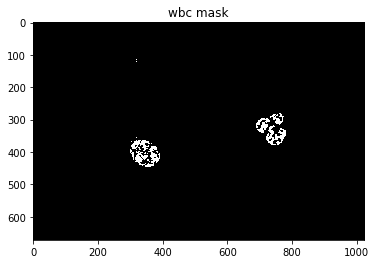

In [21]:
#9 trial and error, wbc threshold is aroun 0.3
msk_wbc = im_r<0.35
plt.imshow(msk_wbc, cmap="gray")
plt.title('wbc mask')